<a href="https://www.kaggle.com/code/francescoliveras/ps-s3-e15-eda-model-en-es?scriptVersionId=130021576" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E14 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Predicting Critical Heat Flux dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Files
* ```data.csv``` - the competition dataset; your objective is to impute the missing values of the feature x_e_out [-] (equilibrium quality)
* ```sample_submission.csv``` - a sample submission file in the correct format


*Context*

This dataset was prepared for the journal article entitled "On the prediction of critical heat flux using a physics-informed machine learning-aided framework" (doi: 10.1016/j.applthermaleng.2019.114540). The dataset contains processed and compiled records of experimental critical heat flux and boundary conditions used for the work presented in the article.


**🟥ES**:
El conjunto de datos para esta competición (tanto de entrenamiento como de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos Predicting Critical Heat Flux. Las distribuciones de las características son similares, aunque no exactamente iguales, a las del original. No dude en utilizar el conjunto de datos original como parte de esta competición, tanto para explorar las diferencias como para ver si la incorporación del original en el entrenamiento mejora el rendimiento del modelo.

Archivos
* ```train.csv``` - el conjunto de datos de entrenamiento; el rendimiento es el objetivo
* ```test.csv``` - el conjunto de datos de prueba; su objetivo es predecir el rendimiento dadas las otras características
* ```sample_submission.csv``` - un archivo de envío de muestra en el formato correcto


*Contexto*

Este conjunto de datos se preparó para el artículo de la revista titulado "On the prediction of critical heat flux using a physics-informed machine learning-aided framework" (doi: 10.1016/j.applthermaleng.2019.114540). El conjunto de datos contiene registros procesados y compilados de flujo de calor crítico experimental y condiciones de contorno utilizadas para el trabajo presentado en el artículo.

In [1]:
import os 
import sys
import math
import time
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL

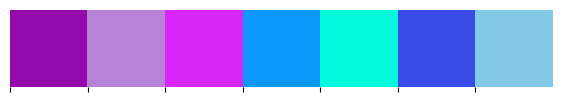

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
INCLUDE_ORIGINAL = True
RANDOM_STATE = 500

sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))
SEED = 500

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s3e15"
DATA_FILENAME = "data.csv"
SUBMISSION_FILENAME = "sample_submission.csv"
ORIGINAL_PATH = "/kaggle/input/predicting-heat-flux/Data_CHF_Zhao_2020_ATE.csv"

# Data dir
DATA_DIR = os.path.join(PATH, DATA_FILENAME)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)

In [5]:
TARGET = ""

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [6]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    plt.show()

In [7]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [8]:
def show_distance(df, title="Show distance"):
    hierarchy.set_link_color_palette(PALETTE_7_C)
    # Calculate the Spearman correlation matrix
    correlation = df.corr(method='spearman')
    
    # Calculate the distance matrix using the absolute correlation values
    dist = linkage(squareform(1 - abs(correlation)), 'complete')
    
    # Create a new figure for the dendrogram plot
    plt.figure(figsize=(8, 4), dpi=100)
    dn = dendrogram(dist, labels=df.columns, above_threshold_color=PALETTE_3[2], orientation='right')
    hierarchy.set_link_color_palette(None)
    
    plt.title(title, size=20, weight='bold')
    plt.show()

In [9]:
## Boolean values only
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[LIGTH_BLUE,"#221e8f"], color=[BLUE ,DARK_BLUE],
            title="Target distribution"):
#     df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=600)
    fig.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [10]:
data_df = pd.read_csv(DATA_DIR)
original_df = pd.read_csv(ORIGINAL_PATH)
submission_df = pd.read_csv(SUBMISSION_DIR)

data_df.drop('id', axis = 1, inplace = True)
original_df.drop('id', axis = 1, inplace = True)

In [11]:
data_df.head()

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [12]:
original_df.head()

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [13]:
submission_df.head()

,id,x_e_out [-]
0,4,0.0
1,7,0.0
2,10,0.0
3,12,0.0
4,23,0.0


In [14]:
data_description(original_df)
data_description(data_df)

Data description
Total number of records 1865
number of features 9


                  Name     Type  Unique levels  Missing
0               author   object             10        0
1             geometry   object              3        0
2       pressure [MPa]  float64            114        0
3  mass_flux [kg/m2-s]    int64            578        0
4          x_e_out [-]  float64           1360        0
5             D_e [mm]  float64             36        0
6             D_h [mm]  float64             41        0
7          length [mm]    int64             54        0
8      chf_exp [MW/m2]  float64            109        0
Data description
Total number of records 31644
number of features 9


                  Name     Type  Unique levels  Missing
0               author   object             10     5024
1             geometry   object              3     5500
2       pressure [MPa]  float64            144     4452
3  mass_flux [kg/m2-s]  float64            733     4791
4          x_e_out [-

/tmp/ipykernel_20/1974609372.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


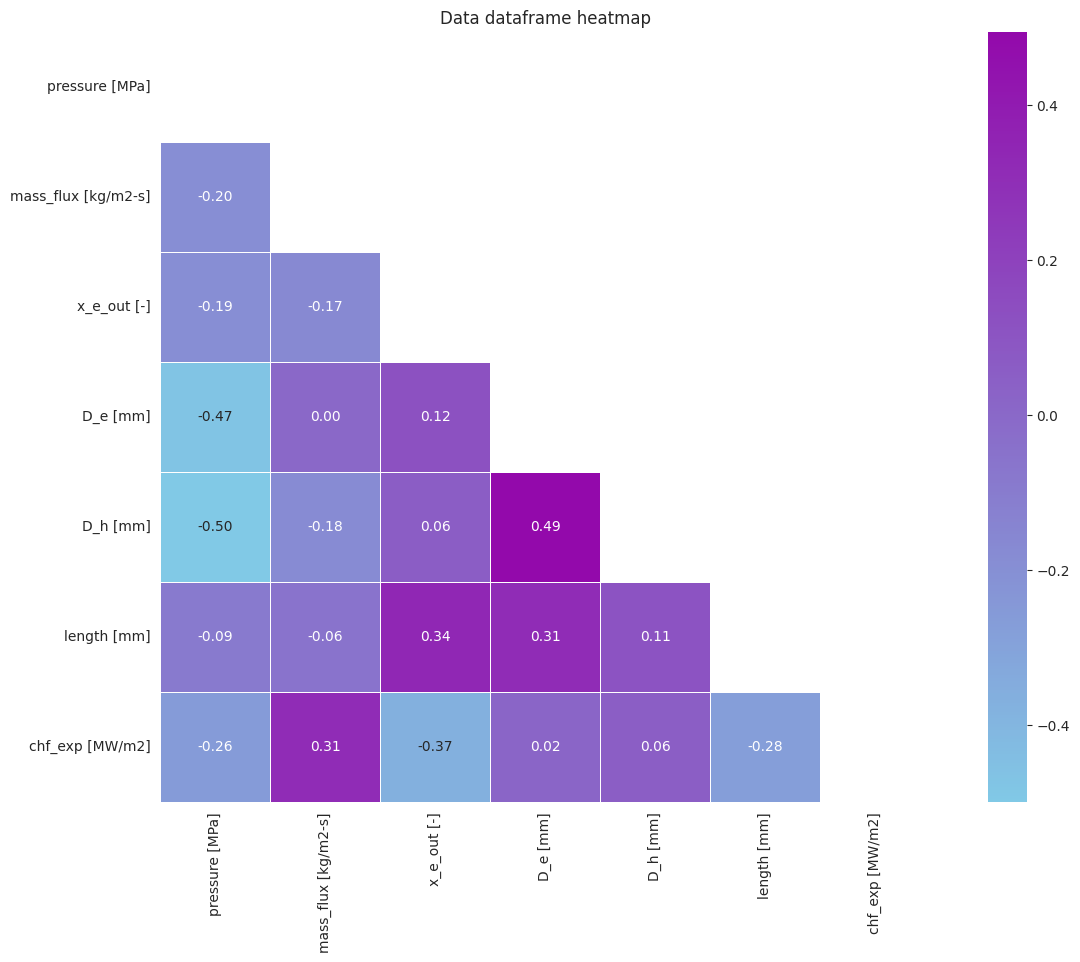

None

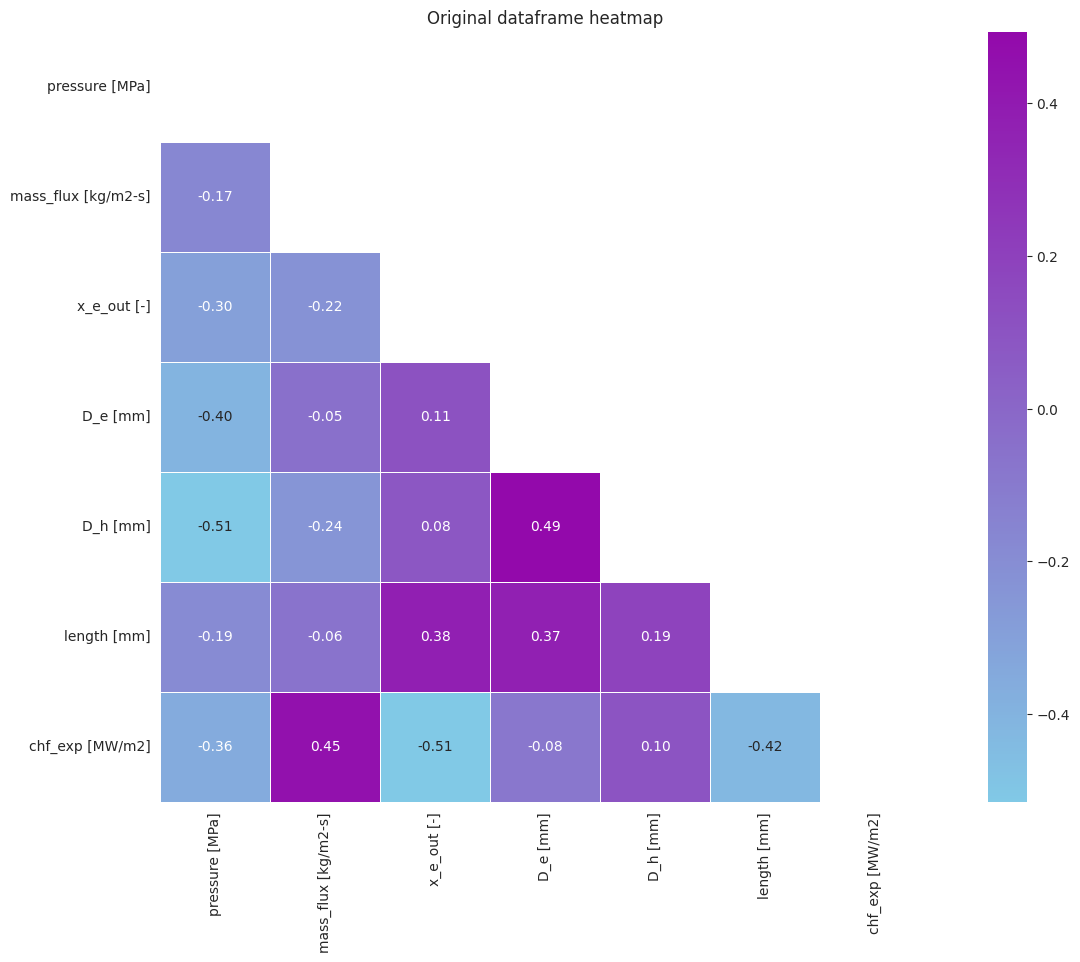

None

In [15]:
display(show_corr_heatmap(data_df, "Data dataframe heatmap"))
display(show_corr_heatmap(original_df, "Original dataframe heatmap"))

In [16]:
cat_cols = data_df.columns[:2]
num_cols = data_df.columns[2:]

In [17]:
num_cols

Index(['pressure [MPa]', 'mass_flux [kg/m2-s]', 'x_e_out [-]', 'D_e [mm]',
       'D_h [mm]', 'length [mm]', 'chf_exp [MW/m2]'],
      dtype='object')

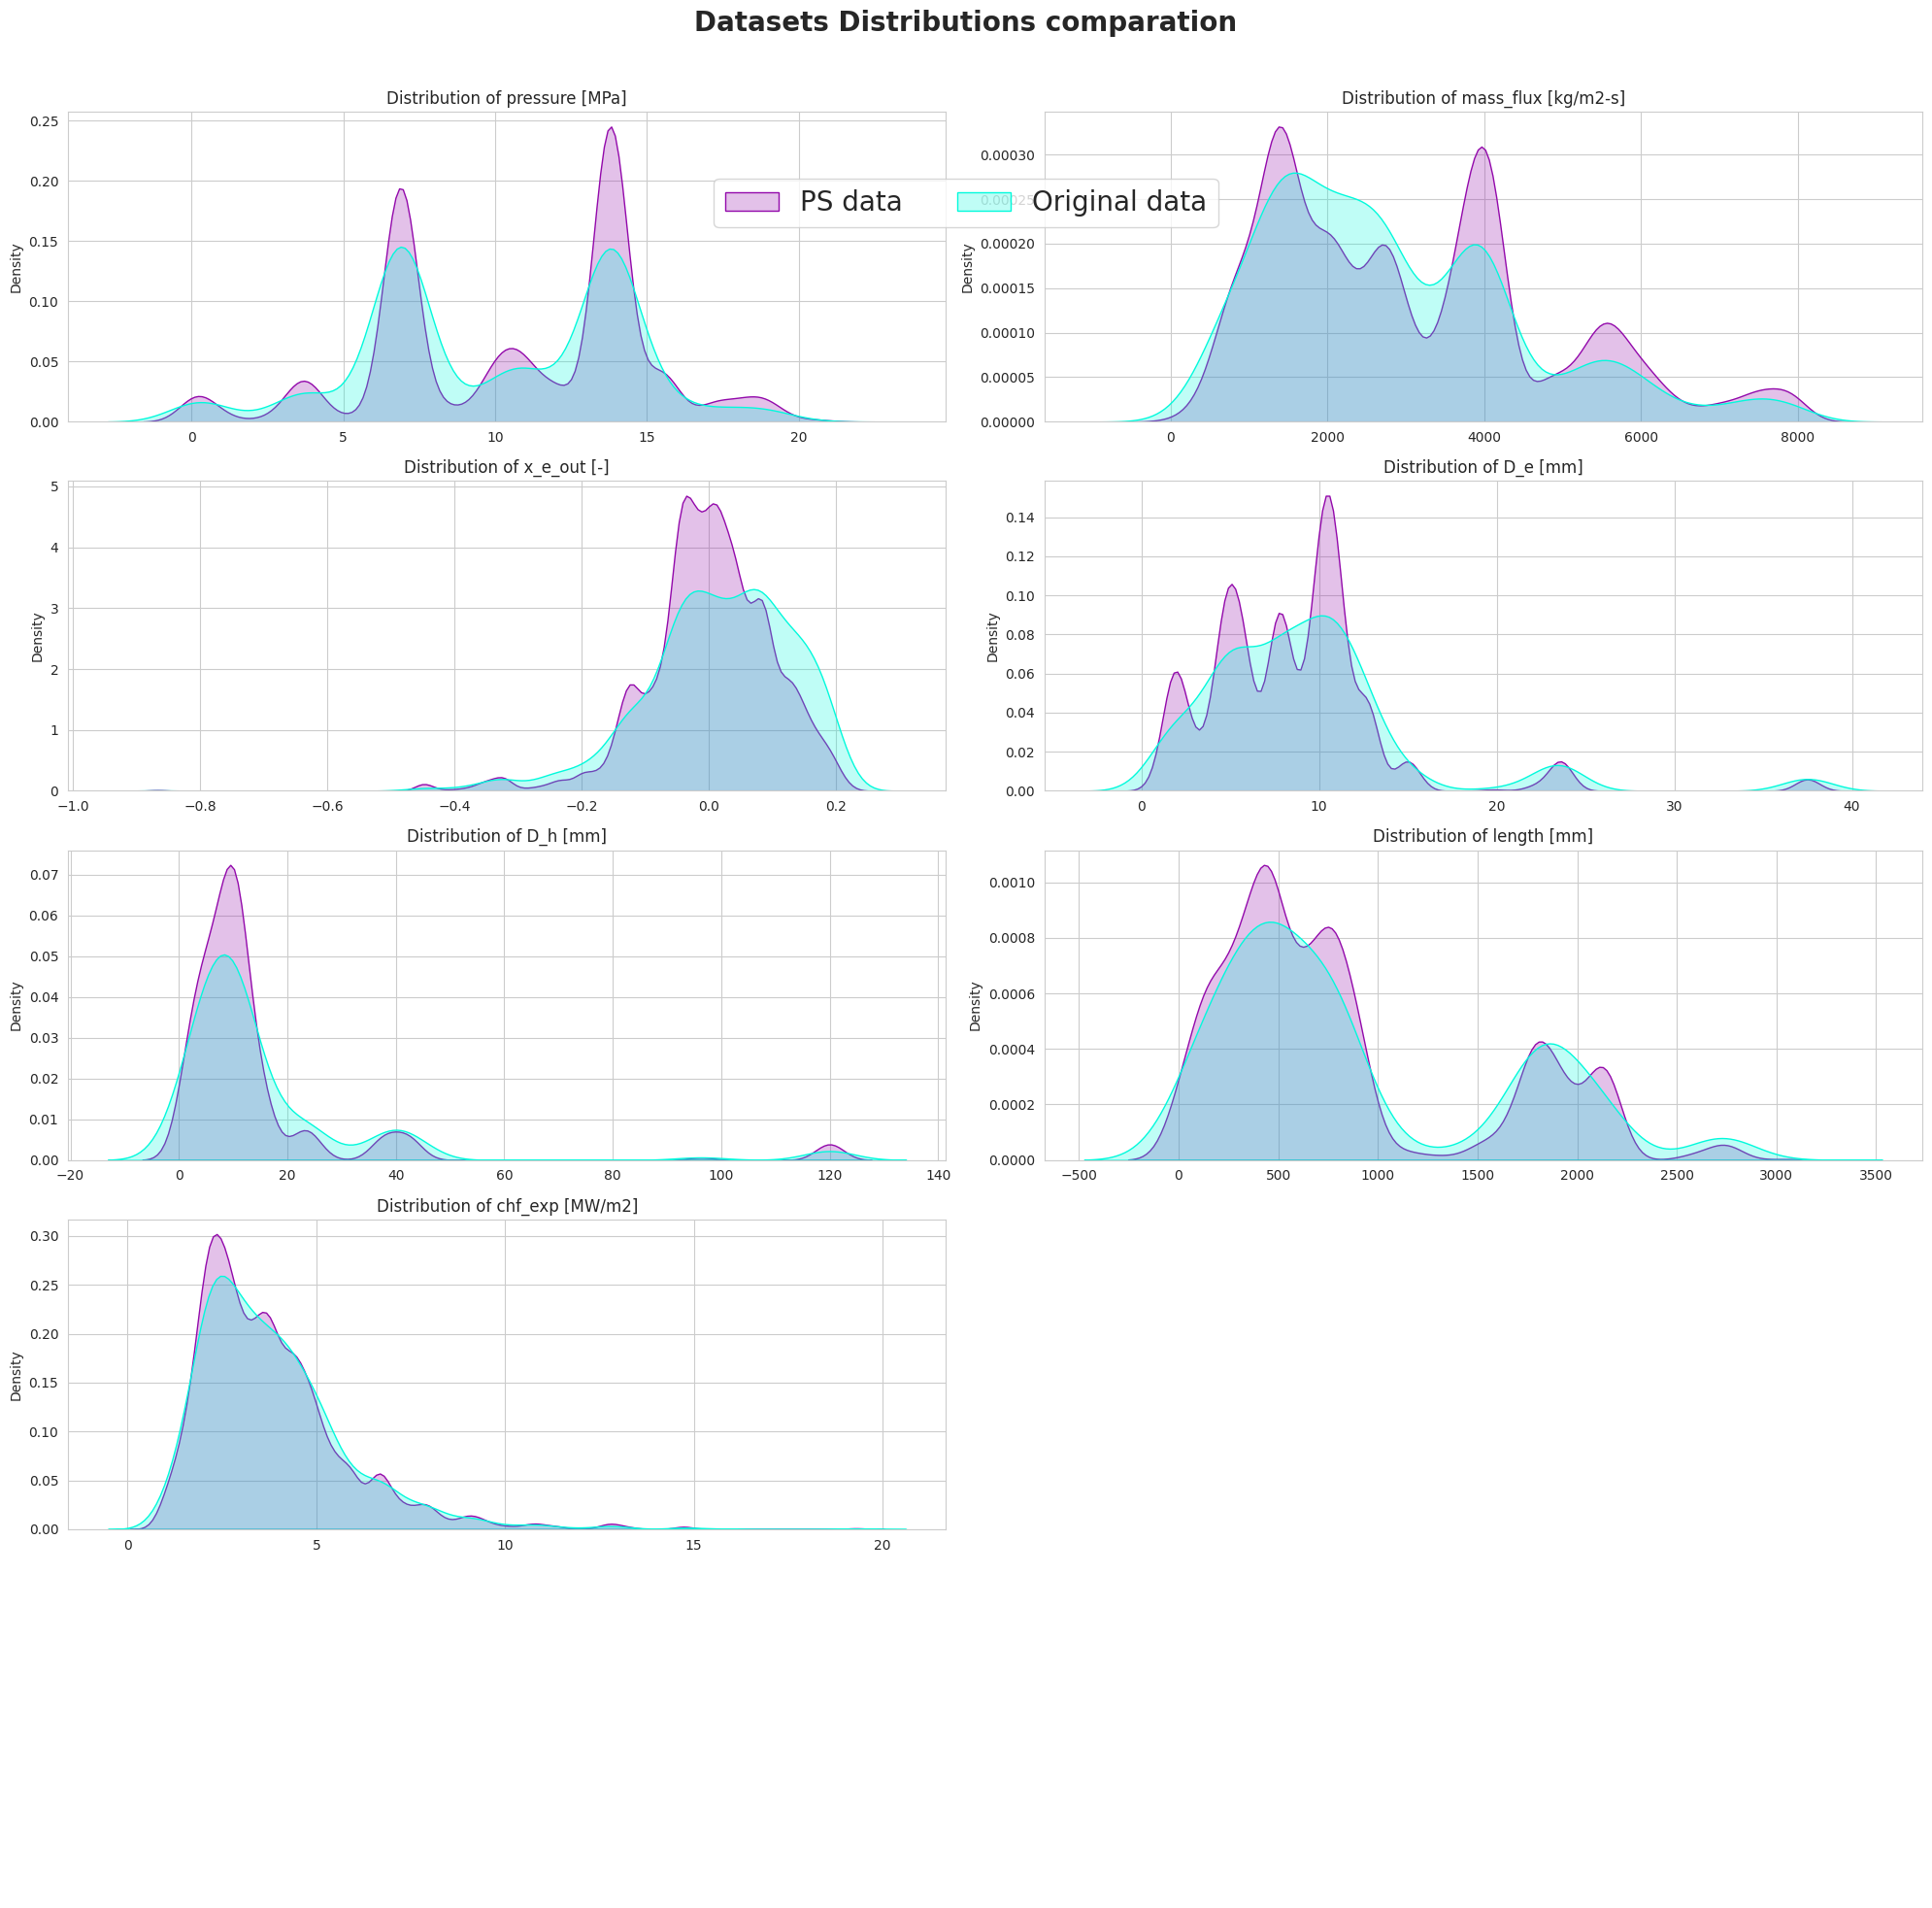

In [18]:
columns = original_df.columns
labels = ["PS data", "Original data"]
n_cols = 2
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(num_cols):
    plot_axes = [ax[i]]
          
    sns.kdeplot(
        data_df[column], label="Data PS dataframe",
        ax=ax[i], color=PALETTE_7_C[0], fill = True
    )
    
    sns.kdeplot(
        original_df[column], label="Original train dataframe",
        ax=ax[i], color=PALETTE_7_C[3], fill = True
    )
    
    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
    plot_axes = [ax[i]]
    handles = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")
    
fig.suptitle(f"Datasets Distributions comparation\n\n", fontsize=20, ha="center", fontweight="bold")
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.9), fontsize=20, ncol=4)
plt.tight_layout()

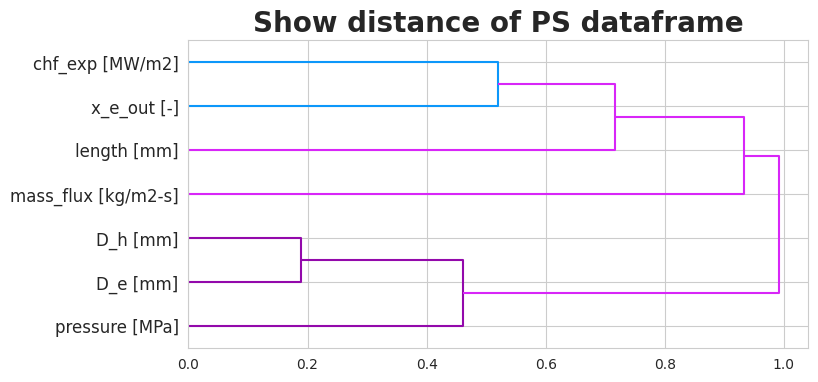

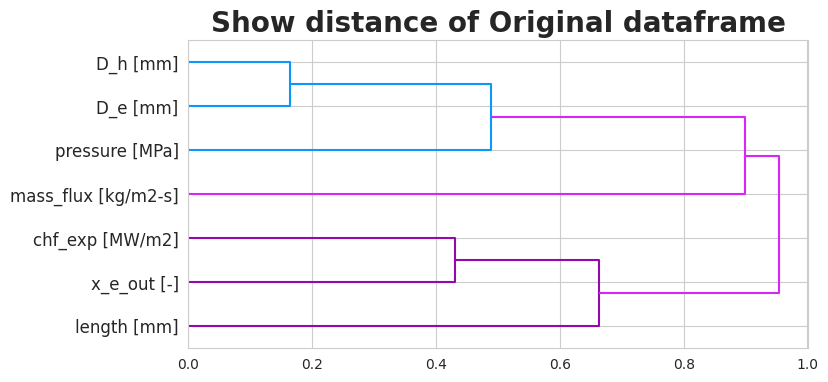

In [19]:
show_distance(data_df[num_cols], "Show distance of PS dataframe")
show_distance(original_df[num_cols], "Show distance of Original dataframe")